############################################
Random Seed: 7270
############################################


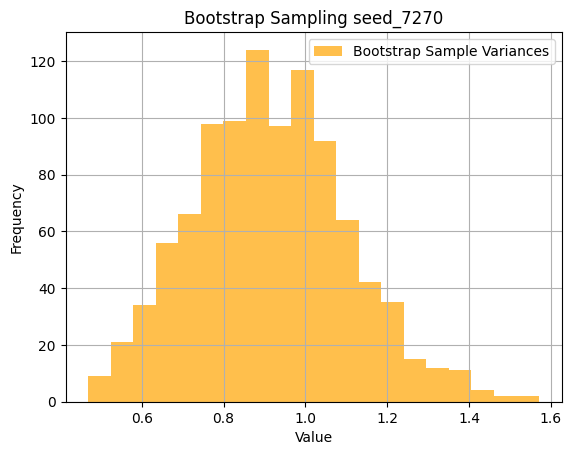

Bootstrap Sample Variance Mean 0.9147290200014895
Bootstrap Sample Variance Variance 0.035569896889741194
############################################
End
############################################


############################################
Random Seed: 860
############################################


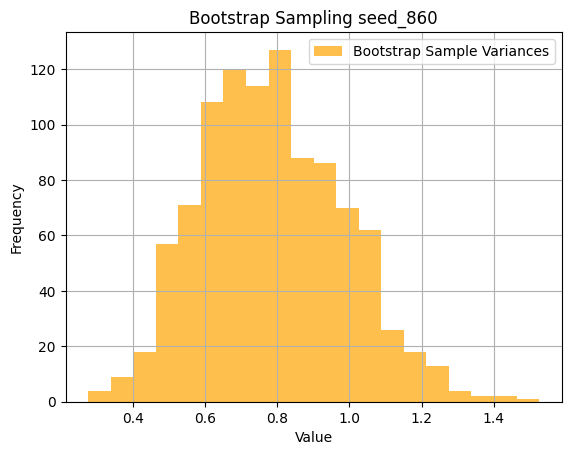

Bootstrap Sample Variance Mean 0.7860688353236184
Bootstrap Sample Variance Variance 0.039622103342130476
############################################
End
############################################


############################################
Random Seed: 5390
############################################


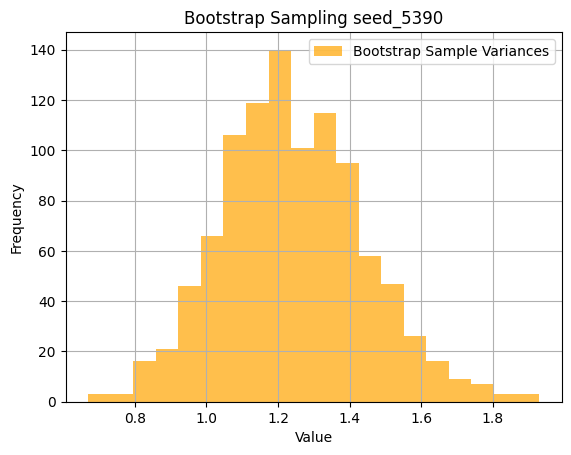

Bootstrap Sample Variance Mean 1.2424227128385217
Bootstrap Sample Variance Variance 0.039495499950110605
############################################
End
############################################


############################################
Random Seed: 5191
############################################


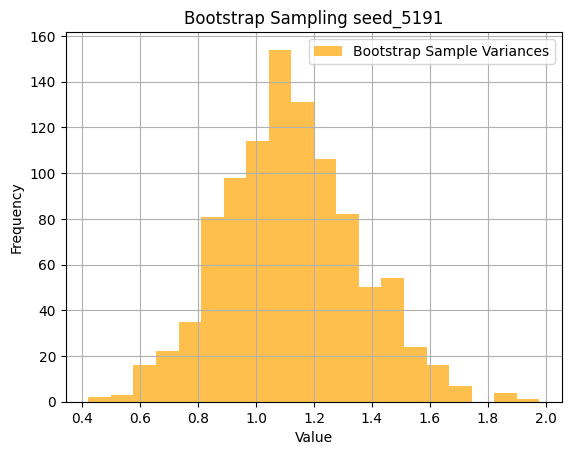

Bootstrap Sample Variance Mean 1.1207037175188104
Bootstrap Sample Variance Variance 0.05410885003678068
############################################
End
############################################


############################################
Random Seed: 5734
############################################


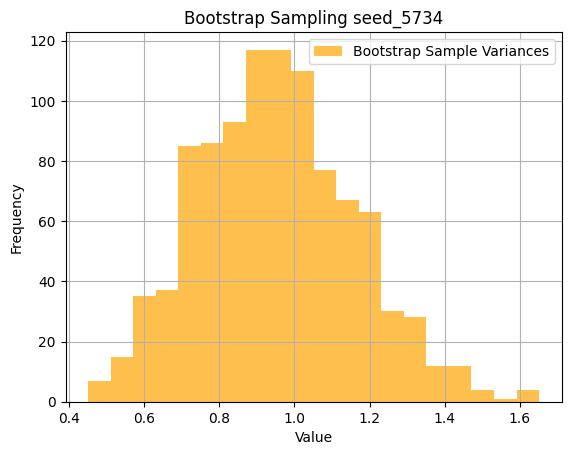

Bootstrap Sample Variance Mean 0.95179139853392
Bootstrap Sample Variance Variance 0.043451704755900614
############################################
End
############################################




In [4]:
# 一次元データに対するBS法 図の描画など
import numpy as np
import matplotlib.pyplot as plt
import statistics

# 乱数生成用のシードを設定
np.random.seed(42)
# 乱数生成の回数
ite = 5
# ランダムな整数値をシード値として取得
random_seed = np.random.randint(0, 10000, ite)  # 例えば 0 〜 9999 の間の整数をite個生成

# ブートストラップサンプリング関数の定義
def bootstrap(data, n_samples):
    """
    :param data: 元データ(一次元配列)
    :param n_samples: サンプリング回数
    :return: ブートストラップされたサンプル群
    """
    n = len(data)
    bootstrap_samples = []
    for _ in range(n_samples):
        sample = np.random.choice(data, n, replace=True)
        bootstrap_samples.append(sample)
    return np.array(bootstrap_samples)
    
n_samples = 1000 # サンプリング回数
    
for seed in np.nditer(random_seed):
    print("############################################")
    print("Random Seed:", seed) # 開始の合図
    print("############################################")
    np.random.seed(seed) # 取得した乱数を新しいシード値として設定
    data = np.random.randn(50) # 元データの生成
    # plt.hist(data, bins=20, alpha=0.7, color='blue', label='Original Data') # 元データのヒストグラム
    # plt.title("Original Data") # グラフの装飾
    # plt.xlabel("Value")
    # plt.ylabel("Frequency") 
    # plt.legend() # 凡例表示
    # plt.grid(True) # グリッド表示
    # plt.show() # 描画

    
    bootstrap_samples = bootstrap(data, n_samples) # ブートストラップサンプリングの実行
    # ---------------------統計量はここで制御---------------------
    bootstrap_means = np.mean(bootstrap_samples, axis=1) # ブートストラップサンプルの平均を計算
    bootstrap_vars = np.var(bootstrap_samples, axis=1) # ブートストラップサンプルの分散を計算
    # ----------------------------------------------------------
    # plt.hist(bootstrap_means, bins=20, alpha=0.7, color='orange', label='Bootstrap Sample Means') # ブートストラップサンプル平均のヒストグラム
    # plt.title("Bootstrap Sampling") # グラフの装飾
    # plt.xlabel("Value")
    # plt.ylabel("Frequency")
    # plt.legend()
    # plt.grid(True)

    plt.hist(bootstrap_vars, bins=20, alpha=0.7, color='orange', label='Bootstrap Sample Variances') # ブートストラップサンプル分散のヒストグラム
    plt.title(f"Bootstrap Sampling seed_{seed}") # グラフの装飾
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.show() # 描画

    # bootstrap_varsの平均
    print("Bootstrap Sample Variance Mean", statistics.mean(bootstrap_vars))
    # bootstrap_varsの分散
    print("Bootstrap Sample Variance Variance", statistics.pvariance(bootstrap_vars))

    # # bootstrap_samplesのサイズ
    # print('bootstrap_samples.shape', bootstrap_samples.shape) # (1, 50)
    
    # # もとデータの平均
    # print("Original Data Mean", statistics.mean(data))
    # # もとデータの分散
    # print("Original Data Variance", statistics.pvariance(data))
    # # 標本平均
    # print("sampled_data Mean", statistics.mean(bootstrap_means))
    # # 標本分散  
    # print("sampled_data Variance", statistics.pvariance(bootstrap_means))

    # 終了の合図
    print("############################################")
    print("End")
    print("############################################")

    # 改行
    print("\n")